In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [8]:
df = pd.read_csv('final preprocessed and cleaned data.csv')

In [9]:
df.head()

,Age,use_vegetables,num_meals_daily,CH2O,physical_activity,use_technological_devices,BMI,Gender_Male,family_history_with_overweight_yes,high_caloric_food_yes,...,smoking_yes,monitor_num_calories_yes,alcohol_Frequently,alcohol_Sometimes,alcohol_no,traveling_Bike,traveling_Motorbike,traveling_Public_Transportation,traveling_Walking,obesity_level
0,-0.458052,-0.787962,0.387607,-0.014691,-1.201111,0.517125,-0.652922,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,-0.458052,1.062931,0.387607,1.636239,2.324961,-1.127965,-0.671104,0,1,0,...,1,1,0,1,0,0,0,1,0,1
2,-0.008186,-0.787962,0.387607,-0.014691,1.149604,0.517125,-0.729071,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,0.788805,1.062931,0.387607,-0.014691,1.149604,-1.127965,-0.350662,1,0,0,...,0,0,1,0,0,0,0,0,1,5
4,-0.228227,-0.787962,-2.230910,-0.014691,-1.201111,-1.127965,-0.167916,1,0,0,...,0,0,0,1,0,0,0,1,0,6


In [10]:
x = df.drop(columns='obesity_level')
y = df['obesity_level']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svm.predict(x_test)

In [14]:
accuracy_score(y_pred, y_test)*100

95.32554257095158

In [15]:
conf_matrix = confusion_matrix(y_pred, y_test)
pd.DataFrame(conf_matrix, columns=range(0, 7))

,0,1,2,3,4,5,6
0,86,6,0,0,0,0,0
1,1,72,0,0,0,3,0
2,0,0,95,2,0,0,2
3,0,0,2,94,1,0,0
4,0,0,0,0,82,0,0
5,0,6,0,0,0,63,3
6,0,0,0,0,0,2,79


Text(0.5, 1.0, 'confusion_matrix')

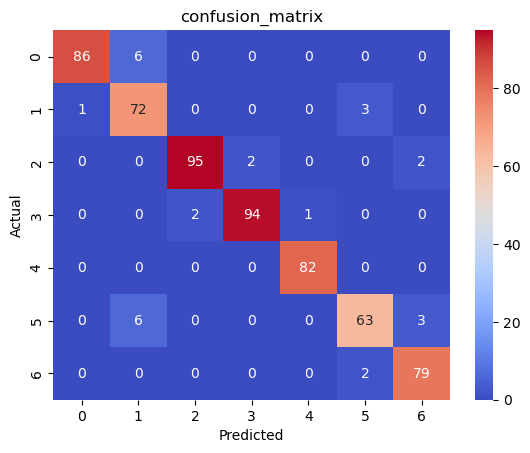

In [16]:
# plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("confusion_matrix")

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        87
           1       0.95      0.86      0.90        84
           2       0.96      0.98      0.97        97
           3       0.97      0.98      0.97        96
           4       1.00      0.99      0.99        83
           5       0.88      0.93      0.90        68
           6       0.98      0.94      0.96        84

    accuracy                           0.95       599
   macro avg       0.95      0.95      0.95       599
weighted avg       0.95      0.95      0.95       599

